<a href="https://colab.research.google.com/github/Nichlas0403/ML_Regression_Unik_System_Design/blob/main/Unik_System_Design_ML_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook recap

The goal of this notebook is to create a Machine Learning model that is able to predict the number of years a given applicant at Unik System Design will be living in a given tenancy. The end result will be implemented in our solution of the final term project.

NOTE: This is a school project and not an actual project for Unik System Design.

## Tools

The programming language of choice will be Python along with the relevant machine learning libraries.

## Data

The data has been downloaded from dst.dk (Danmarks Statistik) and has been prepared by removing irrelivant feautures as well as translating the entire dataset from danish to english. I will still be doing a data exploration analysis as well as preparing the data for training.

NOTE: The target column has been generated data by me, and therefore this dataset won't be a complete reflection of reality.

## Features

Features in this dataset includes:
- Sex of the resident
- Age of the resident
- Number of rooms in the tenancy of the resident
- Number of residents in the tenancy of the given resident
- Type of tenancy
- Region of the tenancy
- Years the resident has lived in the tenancy before moving out (this is the target column and the column with pre-generated data)

## Evaluation

Since this dataset contains few features and one feature with generated data, I won't expect the best results, however it should be noticed that this isn't the goal. Instead the goal is the concept of creating artificial intelligence which we can implement in our project, and show the possibilities of using machine learning in a production environment.

Since the goal isn't to create a perfect model, and the since this part of the project lies outside of evaluation, I will be taking the opportunities to work with tools, I don't normally work with, so I can learn more about this field.

#Import tools

In [ ]:
#Import baseline libraries - more libraries will be imported as needed.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#!pip install scikit-learn==0.23.2
import sklearn
print(sklearn.__version__)

0.23.2


# Data Exploration Analysis

In [ ]:
#Import dataset
df_baseline.head()

,Sex,ResidentsInTheTenancy,NumberOfRoomsInTheTenancy,TypeOfTenancy,LocationOfTenancy,ResidentAgeGroup,YearsLivedInTenancy
0,Male,1,1,Terraced_Chain_And_SemiDetachedHouses,The_Capital_Region_of_Denmark,18-24,3.0
1,Male,1,1,Terraced_Chain_And_SemiDetachedHouses,The_Capital_Region_of_Denmark,25-29,8.0
2,Male,1,1,Terraced_Chain_And_SemiDetachedHouses,The_Capital_Region_of_Denmark,30-39,14.0
3,Male,1,1,Terraced_Chain_And_SemiDetachedHouses,The_Capital_Region_of_Denmark,40-49,23.0
4,Male,1,1,Terraced_Chain_And_SemiDetachedHouses,The_Capital_Region_of_Denmark,50-59,29.0


In [ ]:
#18000 samples, no NaN-samples, 3 numerical datatypes, 4 object datatypes
df_baseline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Sex                        18000 non-null  object 
 1   ResidentsInTheTenancy      18000 non-null  int64  
 2   NumberOfRoomsInTheTenancy  18000 non-null  int64  
 3   TypeOfTenancy              18000 non-null  object 
 4   LocationOfTenancy          18000 non-null  object 
 5   ResidentAgeGroup           18000 non-null  object 
 6   YearsLivedInTenancy        18000 non-null  float64
dtypes: float64(1), int64(2), object(4)
memory usage: 984.5+ KB


## Sex-column exploration

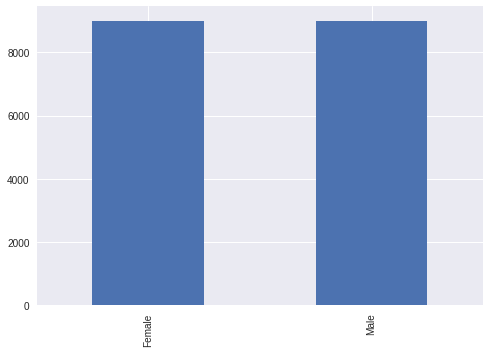

In [ ]:
plt.style.use("seaborn") #changes the plot look

#plot sex-distribution in a bar-graph
pd.value_counts(df_baseline['Sex']).plot.bar();

## ResidentAgeGroup-column exploration

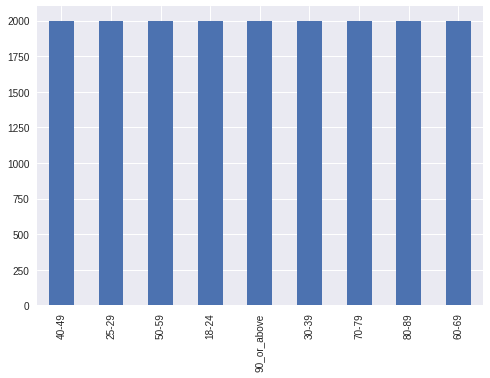

In [ ]:
#plot resident age-group distribution in a bar graph
pd.value_counts(df_baseline["ResidentAgeGroup"]).plot.bar();

## Check genderdistribution in each agegroup

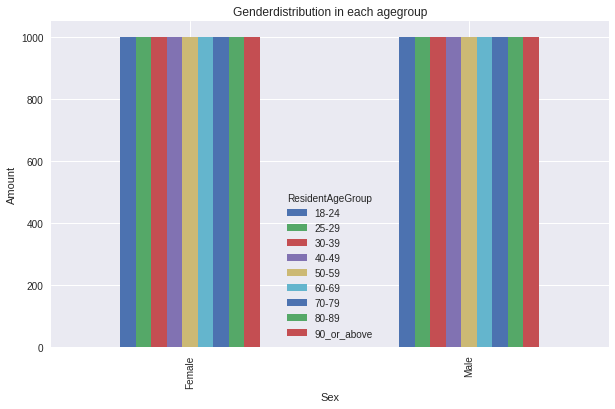

In [ ]:
#Visualize gender-distribution in each agegroup
pd.crosstab(df_baseline["Sex"],df_baseline["ResidentAgeGroup"]).plot(kind="bar",
                                                   figsize=(10,6));

plt.title("Genderdistribution in each agegroup");
plt.ylabel("Amount");

## TypeOfTenancy-column exploration

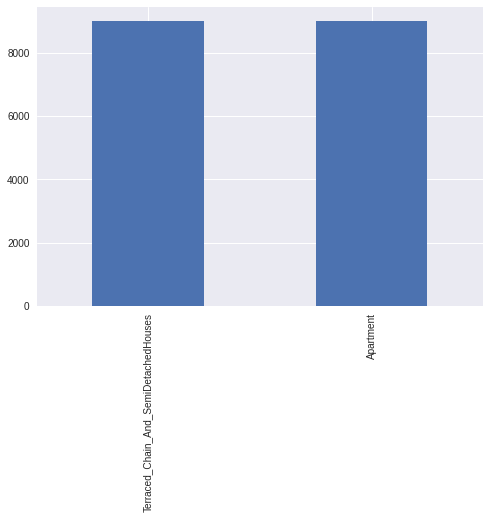

In [ ]:
#Show distribtuion of tenancy-type
df_baseline["TypeOfTenancy"].value_counts().plot.bar()

## Check regiondistribution of TypeOfTenancy-column

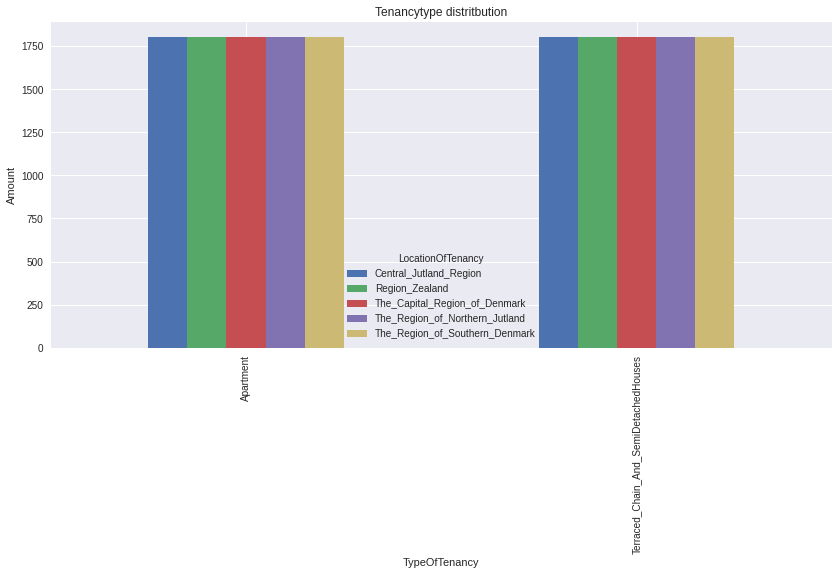

In [ ]:
#Check distribution of tenancy-type in each location
pd.crosstab(df_baseline["TypeOfTenancy"],df_baseline["LocationOfTenancy"]).plot(kind="bar",
                                                   figsize=(14,6));

plt.title("Tenancytype distritbution");
plt.ylabel("Amount");

## Target-column DEA

So far dst has provided a balanced dataset. The YearsLivedInTenancy-column has been generated by my, so let's put our focus there.

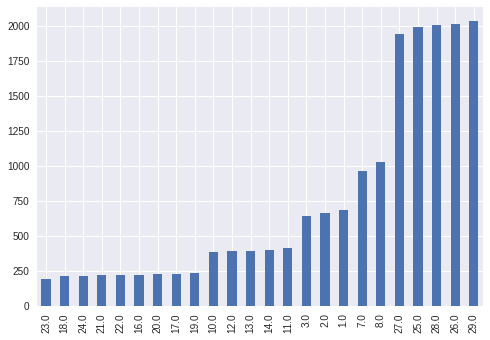

In [ ]:
#This does not look to good - explanation why can be seen in the DEA conclusion.
df_baseline["YearsLivedInTenancy"].value_counts().sort_values().plot.bar()

### Check Genderdistribution in YearsLviedInTenancy-column


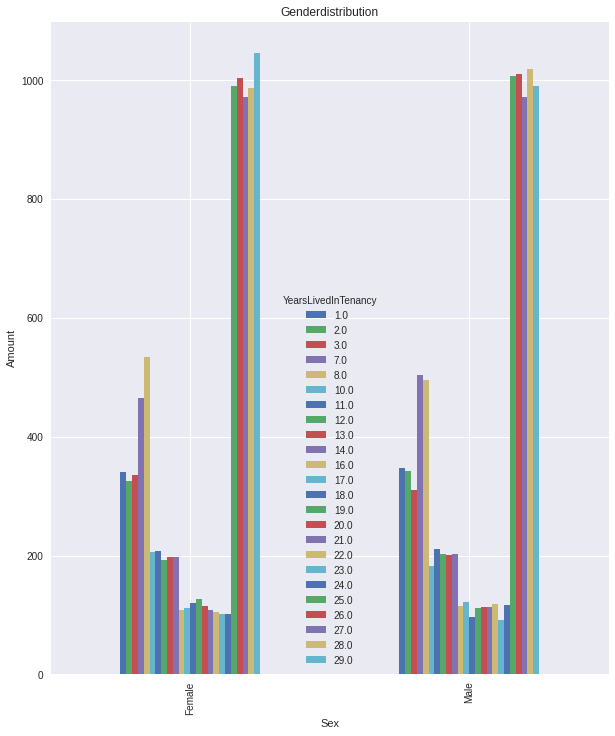

In [ ]:
#Show genderdistribution in the target-column
pd.crosstab(df_baseline["Sex"],df_baseline["YearsLivedInTenancy"]).plot(kind="bar",
                                                   figsize=(10,12));

plt.title("Genderdistribution");
plt.ylabel("Amount");

## DEA conclusion:

It's clear the data provided by Danmarks Statistik is balanced. The unbalanced data that can be seen, is the data I have generated myself using a python script. We can see there are fewest occurrences where a given resident has been living in a given tenancy for 16-24 years. This could potentially be a big problem. My experience so far says a dataset with an unbalanced target-column combined with few features can be a bad combination. The model might just try to predict the values is has seen the most during training. Futher analysis of this scenario will be done in the evaluation-section if relevant.

# Data preparation


## Convert non-numeric data to numeric data

For this I'll be using pandas categorical-datatype functionality, which for each categories found in the dataframe, will be given a numeric value. Male might get the value 0, while Female gets the value 1.

In [ ]:
df_baseline.head()

,Sex,ResidentsInTheTenancy,NumberOfRoomsInTheTenancy,TypeOfTenancy,LocationOfTenancy,ResidentAgeGroup,YearsLivedInTenancy
0,Male,1,1,Terraced_Chain_And_SemiDetachedHouses,The_Capital_Region_of_Denmark,18-24,3.0
1,Male,1,1,Terraced_Chain_And_SemiDetachedHouses,The_Capital_Region_of_Denmark,25-29,8.0
2,Male,1,1,Terraced_Chain_And_SemiDetachedHouses,The_Capital_Region_of_Denmark,30-39,14.0
3,Male,1,1,Terraced_Chain_And_SemiDetachedHouses,The_Capital_Region_of_Denmark,40-49,23.0
4,Male,1,1,Terraced_Chain_And_SemiDetachedHouses,The_Capital_Region_of_Denmark,50-59,29.0


In [ ]:
df_baseline.tail()

,Sex,ResidentsInTheTenancy,NumberOfRoomsInTheTenancy,TypeOfTenancy,LocationOfTenancy,ResidentAgeGroup,YearsLivedInTenancy
17995,Female,5,5,Apartment,The_Region_of_Northern_Jutland,50-59,29.0
17996,Female,5,5,Apartment,The_Region_of_Northern_Jutland,60-69,29.0
17997,Female,5,5,Apartment,The_Region_of_Northern_Jutland,70-79,28.0
17998,Female,5,5,Apartment,The_Region_of_Northern_Jutland,80-89,28.0
17999,Female,5,5,Apartment,The_Region_of_Northern_Jutland,90_or_above,29.0


In [ ]:
for label, content in df_baseline.items():
  #check if content is of numeric datatype
  if not pd.api.types.is_numeric_dtype(content):
    #If not, it will convert the content to categorical datatype
    #the .codes will futher convert it from categorical datatype to it's
    #corresponding numerical value
    df_baseline[label] = pd.Categorical(content)

    #If we at this points still had NaN-values, we would need to add 1 to the 
    #corresponding numeric value.
    #if pandas finds a NaN-sample, the categorical value will be -1,
    #which we don't want. Negative values aren't necessarily a bad thing as 
    #long as it semantically makes sense like if it's the value of a bankaccount. 
    #It is however bad if it doesn't make semantically sense like a negative length
    #or an absolute temperature.
    #Therefore I want to neutralize the number, as there is no reasion to why
    #it should be negative in this scenario.

In [ ]:
#Check datatype - we only got catagory, int and float
df_baseline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Sex                        18000 non-null  category
 1   ResidentsInTheTenancy      18000 non-null  int64   
 2   NumberOfRoomsInTheTenancy  18000 non-null  int64   
 3   TypeOfTenancy              18000 non-null  category
 4   LocationOfTenancy          18000 non-null  category
 5   ResidentAgeGroup           18000 non-null  category
 6   YearsLivedInTenancy        18000 non-null  float64 
dtypes: category(4), float64(1), int64(2)
memory usage: 493.1 KB


In [ ]:
#Before mapping the catagory to the corresponding numerical values, I'm gonna map
#the correlation between each catagory to it's numerical value and save it to a file

#This is because, the inputdata in production, have to be converted to the same
#format as the data the model was trained on.

In [ ]:
#Save mapping to dict, and swap around the key and value in dict
sex_mapping = dict(enumerate(df_baseline['Sex'].cat.categories))
sex_mapping = {v: k for k, v in sex_mapping.items()}

type_of_tenancy_mapping = dict(enumerate(df_baseline['TypeOfTenancy'].cat.categories))
type_of_tenancy_mapping = {v: k for k, v in type_of_tenancy_mapping.items()}

location_of_tenancy_mapping = dict(enumerate(df_baseline['LocationOfTenancy'].cat.categories))
location_of_tenancy_mapping = {v: k for k, v in location_of_tenancy_mapping.items()}

resident_age_group_mapping = dict(enumerate(df_baseline['ResidentAgeGroup'].cat.categories))
resident_age_group_mapping = {v: k for k, v in resident_age_group_mapping.items()}

In [ ]:
#Save mapping
import pickle
file_name = "filename"

open_file = open(file_name + "sex_mapping.pkl", "wb")
pickle.dump(sex_mapping, open_file)
open_file = open(file_name + "type_of_tenancy_mapping.pkl", "wb")
pickle.dump(type_of_tenancy_mapping, open_file)
open_file = open(file_name + "location_of_tenancy_mapping.pkl", "wb")
pickle.dump(location_of_tenancy_mapping, open_file)
open_file = open(file_name + "resident_age_group_mapping.pkl", "wb")
pickle.dump(resident_age_group_mapping, open_file)
open_file.close()

In [ ]:
#example of result when loading file
open_file = open(file_name+"resident_age_group_mapping.pkl", "rb")
loaded_dict = pickle.load(open_file)
open_file.close()

loaded_dict

{'18-24': 0,
 '25-29': 1,
 '30-39': 2,
 '40-49': 3,
 '50-59': 4,
 '60-69': 5,
 '70-79': 6,
 '80-89': 7,
 '90_or_above': 8}

In [ ]:
#Now that the mapping has been saved, the actual categories can be converted into
#numerical values

In [ ]:
for label, content in df_baseline.items():
  #check if content is of numeric datatype
  if not pd.api.types.is_numeric_dtype(content):
    #If not, it will convert the content to categorical datatype
    #the .codes will futher convert it from categorical datatype to it's
    #corresponding numerical value
    df_baseline[label] = pd.Categorical(content).codes

In [ ]:
df_baseline[:1]

,Sex,ResidentsInTheTenancy,NumberOfRoomsInTheTenancy,TypeOfTenancy,LocationOfTenancy,ResidentAgeGroup,YearsLivedInTenancy
0,1,1,1,1,2,0,3.0


## Rescale data

I want to rescale the data to make it easier for the model to find the patterns. For this I'll be using RobustScaler provided by scikit-learn.

Note: It might not be necessary at all to normalize the data - we won't know until we try it. I'll be using the RobustScaler instead of MinMaxScaler(), since I haven't worked with RobustScaler before.

In [ ]:
from sklearn.preprocessing import RobustScaler

#Create X and assign the rescaled dataframe except the target-column
rbX = RobustScaler()
X = rbX.fit_transform(df_baseline.drop("YearsLivedInTenancy",axis=1))

#Create y and assign the rescaled target-column
rbY = RobustScaler()
y = rbY.fit_transform(pd.DataFrame(df_baseline["YearsLivedInTenancy"]))

In [ ]:
X[:1]

array([[ 0.5, -1. , -1. ,  0.5,  0. , -1. ]])

In [ ]:
y[:1]

array([[-1.375]])

In [ ]:
import joblib
#Save rbX and rbY so it can be used on production data
joblib.dump(rbX, 'filename', compress=True)
joblib.dump(rbY, 'filename', compress=True)

## Split data into training and validation sets

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#Split data into training and validation data
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.15,
                                                  random_state=42)

In [ ]:
#Check shapes
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((15300, 6), (15300, 1), (2700, 6), (2700, 1))

# Modelling

## Import models

Models I will try:
- Support Vector Regressor - https://scikit-learn.org/stable/modules/svm.html#regression
- Random Forrest Regressor - https://scikit-learn.org/stable/modules/ensemble.html

In [ ]:
#Import algorithms
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor

In [ ]:
#Create dict to hold models
models = {"SVM" : svm.SVR(),
          "RFR" : RandomForestRegressor()}

## Train models

In [ ]:
#Create dict to hold evaluations
results = {}

In [ ]:
#Iterate through models-dict and train
#Save their scores to the results-dict

for model_name, model in models.items():
  model.fit(X_train,y_train)
  
  results[model_name] = model.score(X_val, y_val)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


## Evaluation

In [ ]:
#NOTE: model.score uses R^2 when training a regression-model - best possible
#R^2 score is 1
results

{'RFR': 0.9688283816566077, 'SVM': 0.9683877135004936}

### Cross-validation

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
#Crossfold validation to make sure the models didn't get "lucky/unlucky" during
#datasplit
#Train and evaluates both models on 5 different part of the dataset
#Print their score

cvs_results = {}

for model_name, model in models.items():
  cvs_results[model_name] = cross_val_score(model,X,y,cv=5)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/usr/loc

In [ ]:
cvs_results

{'RFR': array([0.96710822, 0.96675289, 0.96916915, 0.96682217, 0.96849405]),
 'SVM': array([0.96707258, 0.96715654, 0.96719214, 0.96637651, 0.96654506])}

### Mean absolute error

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
#Mean absolute error takes the mean of the absolute values of y_true - y_prediction´

for model_name, model in models.items():
  print(mean_absolute_error(y_val, model.predict(X_val)))

0.08470001821073865
0.08182077834652488


## Conclusion

Overall, the Random Forest Regressor did best, but since I already have quite a bit experience with that algorithm, I'll go with Support Vector Regressor instead. It is already performing quite well, but I will still try a bit of hyperparametertuning, and see if I can squish a bit more out of it.

NOTE: While the R^2 and MAE tests show good results, it should be noted that those results does not equal a good and precise model.
Think of it this way: If we have a dataset where 95% of the target column is of class 1, and the last 5 % are of class 2, the model might just only learn the patterns which correlates to class 1. This means, during testing, the model will be wrong 5% of the time. If you only look at the numbers, this sounds great, but the reality is, that the model simply hasn't learn the patterns which leads to class 2, so in a production environment, it will be unable to give accurate predictions.

This might be the case of this model since the target-column is unbalanced and the number of features are low. I will be during a test-phase after the hyperparametertuning.

In [ ]:
#Save Support Vector Regressor
import pickle

In [ ]:
pickle.dump(models["SVM"], 
            open("filename",
           "wb")) #write binary

In [ ]:
model = pickle.load(open("filename",
                         "rb")) #read binary

## Hyperparameter tuning

I'll first do a RandomizedSearchCV with selected hyperparameters. If relevant, I'll do a GridSearchCV with selected hyperparameters based on the results from the RandomizedSearchCV.


### RandomziedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [ ]:
#Get hyperparameters from the model
model.get_params

<bound method BaseEstimator.get_params of SVR()>

In [ ]:
#Create grid with selected hyperparametersettings to try.
grid = {"kernel" : ["linear","poly","rbf","sigmoid"],
        "gamma" : ["scale","auto"],
        "C" : [0.1,0.5,1], 
        "shrinking" : [False,True]}

In [ ]:
SVR_RSCV = RandomizedSearchCV(svm.SVR(),
                              param_distributions=grid,
                              n_iter=10, #number of iterations
                              cv=5) #number of crossvalidatons

#RandomizedSearchCV will train 10*5 models, with random hyperparameters combinations
#from the grid above
#After training we'll be able to see which hyperparametersettings yielded best
#results.

#Train model
#SVR_RSCV.fit(X_train, y_train)

In [ ]:
#pickle.dump(SVR_RSCV, 
#            open("filename",
#           "wb"))

In [ ]:
SVR_RSCV = pickle.load(open("filename",
                         "rb"))

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator SVR from version 0.22.2.post1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator RandomizedSearchCV from version 0.22.2.post1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [ ]:
#Compare hyperparameters from basline SVR and RandomizedSearch SVR

#Baseline_models hyperparameters
model.get_params

<bound method BaseEstimator.get_params of SVR()>

In [ ]:
#RandomizedSearchCV's hyperparametesr

SVR_RSCV.best_params_

{'C': 0.5, 'gamma': 'scale', 'kernel': 'rbf', 'shrinking': False}

In [ ]:
#Compare MAE
mean_absolute_error(y_val, model.predict(X_val))

0.08470001821073865

In [ ]:
#mean_absolute_error(y_val, SVR_RSCV.predict(X_val))

#NOTE: This has been commented out since I had to change the version of python
#I used almost at the end of this ML project. Because of that, I couldn't call
#The MAE on the SVR_RSCV - the result was a bit below the MAE of the baseline_model.

#### RandomizedSearchCV conclusion

The model did not improve its score or MAE.

At this point I could do a GridSearchCV with hyperparameters which lie between the default model and the RandomizedSearchCV, but I don't believe the results will be improved.

## Test

Compare prediction on validation_set to the true value

In [ ]:
#Load model
model = pickle.load(open("filename",
                         "rb"))

In [ ]:
rbX = joblib.load("filename")
rbY = joblib.load("filename")

In [ ]:
X_val[:1]

array([[ 0.5, -1. ,  0.5, -0.5, -0.5, -1. ]])

In [ ]:
#Predict with validation set
svr_pred = model.predict(X_val)

#Reverse the rescaling
svr_pred = rbY.inverse_transform(svr_pred.reshape(-1,1))

#NOTE: Since the data the model was trained on was scaled, the data used in a
#production environment would also have to be rescaled. The prediction would
#the look like this:
#svr_pred = model.predict(rbX.transform(X_val))

In [ ]:
#Reverse the rescaled prediction values
y_val = rbY.inverse_transform(y_val)

In [ ]:
#Model's predictions
svr_pred[:5]

array([[ 1.83854302],
       [27.15987908],
       [20.25373417],
       [13.41367663],
       [26.58721074]])

In [ ]:
#Actual values
y_val[:5]

array([[ 3.],
       [26.],
       [24.],
       [13.],
       [29.]])

In [ ]:
#Prediction values of last five samples
svr_pred[-5:]

array([[ 6.37479433],
       [27.40268587],
       [24.72995784],
       [13.14971973],
       [25.39191653]])

In [ ]:
#Actual values of last five samples
y_val[-5:]

array([[ 8.],
       [27.],
       [27.],
       [10.],
       [25.]])

# Conclusion

The models has shown great results and is ready to be integrated.

My fear of the model only learning the patterns related to the most frequent target-value proved to be wrong this time.

If I had to keep going with this project, I would definetly try to gather more data along with a proper target-column. If this were to happen, I would also go back and retrain other models along with trying other normalization tools.

# How it would look in production

NOTE: This python-script will in our semester-project recieve data from a C#-program. The outcommented bit below the tool-import represents the recieved data - I have commented it out and created some dummy-data below, which will be used now.

In [ ]:
import sys
import numpy as np
import pandas as pd
import sklearn
import pickle
import os
from sklearn.preprocessing import RobustScaler
import joblib

#Sex = string(sys.argv[1])
#ResidentsInTheTenancy = string(sys.argv[2])
#NumberOfRoomsInTheTenancy = string(sys.argv[3])
#TypeOfTenancy = string(sys.argv[4])
#LocationOfTenancy = string(sys.argv[5])
#ResidentAgeGroup = stirng(sys.argv[6])

#Dummy-data. Could be the data recieved from above
Sex = "Male"
ResidentsInTheTenancy = 1
NumberOfRoomsInTheTenancy = 1
TypeOfTenancy = "Terraced_Chain_And_SemiDetachedHouses"
LocationOfTenancy = "The_Capital_Region_of_Denmark	"
ResidentAgeGroup = "18-24"

#plot recieved data into dataframe
data = pd.DataFrame({"Sex" : [Sex],
                     "ResidentsInTheTenancy" : [ResidentsInTheTenancy],
                     "NumberOfRoomsInTheTenancy" : [NumberOfRoomsInTheTenancy],
                     "TypeOfTenancy" : [TypeOfTenancy],
                     "LocationOfTenancy" : [LocationOfTenancy],
                     "ResidentAgeGroup" : [ResidentAgeGroup]})

data

,Sex,ResidentsInTheTenancy,NumberOfRoomsInTheTenancy,TypeOfTenancy,LocationOfTenancy,ResidentAgeGroup
0,Male,1,1,Terraced_Chain_And_SemiDetachedHouses,The_Capital_Region_of_Denmark\t,18-24


In [ ]:
#Import category-mapping files

file_name = "filename"
open_file = open(file_name+"sex_mapping.pkl", "rb")
sex_mapping = pickle.load(open_file)

open_file = open(file_name + "type_of_tenancy_mapping.pkl","rb")
type_of_tenancy_mapping = pickle.load(open_file)

open_file = open(file_name + "location_of_tenancy_mapping.pkl","rb")
location_of_tenancy_mapping = pickle.load(open_file)

open_file = open(file_name + "resident_age_group_mapping.pkl","rb")
resident_age_group_mapping = pickle.load(open_file)
open_file.close()

In [ ]:
#Map values in the recieved data according to the category-files

for key, value in sex_mapping.items():
  if str(key) in str(data['Sex']):
    data['Sex'] = value

for key, value in type_of_tenancy_mapping.items():
  if str(key) in str(data['TypeOfTenancy']):
    data['TypeOfTenancy'] = value

for key, value in location_of_tenancy_mapping.items():
  if str(key) in str(data['LocationOfTenancy']):
    data['LocationOfTenancy'] = value

for key, value in resident_age_group_mapping.items():
  if str(key) in str(data['ResidentAgeGroup']):
    data['ResidentAgeGroup'] = value

In [ ]:
data

,Sex,ResidentsInTheTenancy,NumberOfRoomsInTheTenancy,TypeOfTenancy,LocationOfTenancy,ResidentAgeGroup
0,1,1,1,1,2,0


In [ ]:
#Import trained model
model = pickle.load(open("filename",
                         "rb"))

#Import rescalers the model was trained on
rbX = joblib.load("filename")
rbY = joblib.load("filename")

#Rescale input and predict
data = rbX.transform(data)
data

array([[ 0.5, -1. , -1. ,  0.5,  0. , -1. ]])

In [ ]:
prediction = model.predict(data)

#Rescale output back to original form
prediction = rbY.inverse_transform(prediction.reshape(-1,1))
prediction

array([[2.05090489]])